In [1]:
#CSV Format in Python

#Option 1: Each Row is a list (List of Lists) 

    csv = [ [1,2,3],['a','b','c']]
    
#Option 2: Each row as a dict (List of Dicts),Keys can be column names

    csv = [{'name1':'A1','name2':'A2'},{'name1':'B1','name2':'B2'}]

# unicodecsv is the python module similar to the csv module and has better methods to deal the data.


In [2]:
import unicodecsv

with open(r"C:\Users\ksair\Desktop\Udacity\Intro to Data Analysis\data\enrollments.csv",'rb') as f:
    reader = unicodecsv.DictReader(f)
    print(type(reader))
    # Conevrting the reader to a list for ease access.
    enrollments = list(reader)

enrollments[110]

<class 'unicodecsv.py3.DictReader'>


OrderedDict([('account_key', '943'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2014-11-17'),
             ('days_to_cancel', '7'),
             ('is_udacity', 'False'),
             ('is_canceled', 'True')])

<h5>Make a function to open the files</h5>

In [3]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

def open_csv(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        # Conevrting the reader to a list for ease access.
        return list(reader)

enrollments = open_csv(r"C:\Users\ksair\Desktop\Udacity\Intro to Data Analysis\data\enrollments.csv")
daily_enagagments = open_csv(r"C:\Users\ksair\Desktop\Udacity\Intro to Data Analysis\data\daily_engagement.csv")
project_submissions = open_csv(r"C:\Users\ksair\Desktop\Udacity\Intro to Data Analysis\data\project_submissions.csv")

print(enrollments[9])
print()
pp.pprint(daily_enagagments[9])
pp.pprint(project_submissions[9])

OrderedDict([('account_key', '700'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2014-11-16'), ('days_to_cancel', '6'), ('is_udacity', 'False'), ('is_canceled', 'True')])

OrderedDict([   ('acct', '0'),
                ('utc_date', '2015-01-18'),
                ('num_courses_visited', '1.0'),
                ('total_minutes_visited', '38.330548'),
                ('lessons_completed', '0.0'),
                ('projects_completed', '0.0')])
OrderedDict([   ('creation_date', '2015-07-29'),
                ('completion_date', '2015-07-29'),
                ('assigned_rating', 'INCOMPLETE'),
                ('account_key', '381'),
                ('lesson_key', '3165188753'),
                ('processing_state', 'EVALUATED')])


In [4]:
%timeit open_csv(r"C:\Users\ksair\Desktop\Udacity\Intro to Data Analysis\data\enrollments.csv")

10.8 ms ± 547 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<h3>Fixing Datatypes</h3>

In [5]:
import datetime

# Changing the datatype of the strings to datetime objects
def parse_date(date):
    if date == '' or date == None:
        return None
    else:
        return datetime.datetime.strptime(str(date),'%Y-%m-%d')

# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.    
def may_be_int(value):
    if value == '' or value == None:
        return None
    else:
        return int(value)


In [6]:
# Converting the data-types from strings to desired values : enrollments.csv 
for enrollment in enrollments:
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = may_be_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = (enrollment['is_canceled'] == 'True')
    enrollment['is_udacity'] = (enrollment['is_udacity'] == 'True')

enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [7]:
# Converting the data-types from strings to desired values : daily_enagament.csv
for daily_enagagment in daily_enagagments:
    daily_enagagment['utc_date'] = parse_date(daily_enagagment['utc_date'])
    daily_enagagment['num_courses_visited'] = int(float(daily_enagagment['num_courses_visited']))
    daily_enagagment['total_minutes_visited'] = float(daily_enagagment['total_minutes_visited'])
    daily_enagagment['lessons_completed'] = int(float(daily_enagagment['lessons_completed']))
    daily_enagagment['projects_completed'] = int(float(daily_enagagment['projects_completed']))
daily_enagagments[0]    

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [8]:
# Converting the string f1 to direct float raises an Error.
f1 = "120.0"

int(f1) # Wrong Way.
int(float(f1)) # Converting in correct way.

ValueError: invalid literal for int() with base 10: '120.0'

In [9]:
# Converting the data-types from strings to desired values : enrollments.csv
for project_submission in project_submissions:
    project_submission['creation_date'] = parse_date(project_submission['creation_date'])
    project_submission['completion_date'] = parse_date(project_submission['completion_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

<b style="color:red;">NOTE</b> :: When running the above cells (converting data-types) that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur in that case please go ahead and load the file again.

<h3>Investigating the Data</h3>
<br>
Find the total number of rows and the number of unique students (account keys) in each table.

In [10]:
print(len(enrollments))
print(len(daily_enagagments))
print(len(project_submissions))

1640
136240
3642


In [11]:
# initialize my_set
my_set = set("apple")
print(my_set)
# check if 'a' is present
# Output: True
print('a' in my_set)

# check if 'p' is not present
# Output: False
print('p' not in my_set)

{'a', 'e', 'l', 'p'}
True
False


In [12]:
# What I came up with
def unique_students(data_list):
    unique_recs = []
    for item in data_list:
        if data_list is daily_enagagments:
            unique_recs.append(item['acct'])
        else:
            unique_recs.append(item['account_key'])

    unique_recs = set(unique_recs)
    unique_recs = list(unique_recs)
    return unique_recs

In [13]:
len(unique_students(enrollments))

1302

<h3>Changing the column name in each Dict</h3>

In [14]:
for item in daily_enagagments:
    item['account_key'] = item['acct']
    del[item['acct']]

In [15]:
daily_enagagments[0]['account_key']

'0'

<h3> Solution From Udacity to above problem </h3>
    

In [16]:
def unique_students_enrolled(data_list):
    unique_students_enrolled_set = set()
    for item in data_list:
        unique_students_enrolled_set.add(item['account_key'])
    
    data_list_len = len(data_list)
    return (unique_students_enrolled_set)

In [17]:
print(f'''Unique Enrollments: {len(unique_students_enrolled(enrollments))}''')
print(f'''Unique Daily Enagaments:{len(unique_students_enrolled(daily_enagagments))}''')
print(f'''Unique Project Submissions:{len(unique_students_enrolled(project_submissions))}''')

Unique Enrollments: 1302
Unique Daily Enagaments:1237
Unique Project Submissions:743


<h4>Using the sets bulit-in methods to solve the question??</h4>
<p>Why there are less number of unique students in Enagaments when compared to the Enrollments.Even on a day of no-activity from the student is logged in as a zero enagagement ?</p>

In [18]:
unique_students_in_enrollments = unique_students_enrolled(enrollments)
unique_students_in_enagagements = unique_students_enrolled(daily_enagagments)

# Set Difference 
#(A - B) is a set of elements that are only in A but not in B.
len(unique_students_in_enrollments - unique_students_in_enagagements)

65

In [19]:
for student in enrollments:
    if student['account_key'] == '997':
        pp.pprint(student)

OrderedDict([   ('account_key', '997'),
                ('status', 'canceled'),
                ('join_date', datetime.datetime(2015, 1, 12, 0, 0)),
                ('cancel_date', datetime.datetime(2015, 1, 12, 0, 0)),
                ('days_to_cancel', 0),
                ('is_udacity', False),
                ('is_canceled', True)])


<b style="color:red;">NOTE :</b> Clearly there are 65 Students were enrolled but not there in the engagements tables? WHY?

In [20]:
# There are 65 Students who are enrolled but not recorded in the engagments
for enrollment in enrollments:
    student_id = enrollment['account_key']
    if student_id not in unique_students_in_enagagements:
        pp.pprint(enrollment)
        break

OrderedDict([   ('account_key', '1219'),
                ('status', 'canceled'),
                ('join_date', datetime.datetime(2014, 11, 12, 0, 0)),
                ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)),
                ('days_to_cancel', 0),
                ('is_udacity', False),
                ('is_canceled', True)])


<b style="color:red;">NOTE :</b> From above O/P we can see that the __join_date__ & __cancel_date__ are same. That is one of the reason for this accounts to be in enrollments.csv but not in the daily_engagements.csv

<h4>Investigating for more problems</h4>
<br>
<ol>
<li>Check for other surprising points in the enagaments tables</li>
<li>Check for other records which are missing other than the above mentioned.</li>
    <li>Check for the records which are not in enagaments but doesn't have the same join & cancel date </li>
</ol>

In [21]:
num_problem_students = 0

for enrollment in enrollments:
    student_id = enrollment['account_key']
    if student_id not in unique_students_in_enagagements and enrollment['join_date'] != enrollment['cancel_date']:
        pp.pprint(enrollment)
        print(student_id)
        num_problem_students += 1

num_problem_students

OrderedDict([   ('account_key', '1304'),
                ('status', 'canceled'),
                ('join_date', datetime.datetime(2015, 1, 10, 0, 0)),
                ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)),
                ('days_to_cancel', 59),
                ('is_udacity', True),
                ('is_canceled', True)])
1304
OrderedDict([   ('account_key', '1304'),
                ('status', 'canceled'),
                ('join_date', datetime.datetime(2015, 3, 10, 0, 0)),
                ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)),
                ('days_to_cancel', 99),
                ('is_udacity', True),
                ('is_canceled', True)])
1304
OrderedDict([   ('account_key', '1101'),
                ('status', 'current'),
                ('join_date', datetime.datetime(2015, 2, 25, 0, 0)),
                ('cancel_date', None),
                ('days_to_cancel', None),
                ('is_udacity', True),
                ('is_canceled', False)])
110

3

<b style="color:red;">NOTE:</b> All the Students in above has one thing in common ----> __'is_udacity' : True__
<p> Those are test accounts created by udacity. We don't need them in our data</p>

<h4>Removing the Test Accounts</h4>

In [22]:
# Creating a set for the udacity test students
udacity_test_accounts = set()

for enrollment in enrollments:
    if enrollment['is_udacity'] is True:
        udacity_test_accounts.add(enrollment['account_key'])
            
(udacity_test_accounts)

{'1069', '1101', '1304', '312', '448', '818'}

In [24]:
# Creating a new-list with OUT the test accounts for all the 3 tables

def remove_udacity_test_students(data_list):
    non_udacity_data = []
    for item in data_list:
        if item['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(item)
    return non_udacity_data

In [25]:
non_udacity_enrollments = remove_udacity_test_students(enrollments)
non_udacity_enagagements = remove_udacity_test_students(daily_enagagments)
non_udacity_submissions = remove_udacity_test_students(project_submissions)


print(len(non_udacity_enrollments))
print(len(non_udacity_enagagements))
print(len(non_udacity_submissions))

1622
135656
3634


<h3>Much More Analysing the issue</h3>

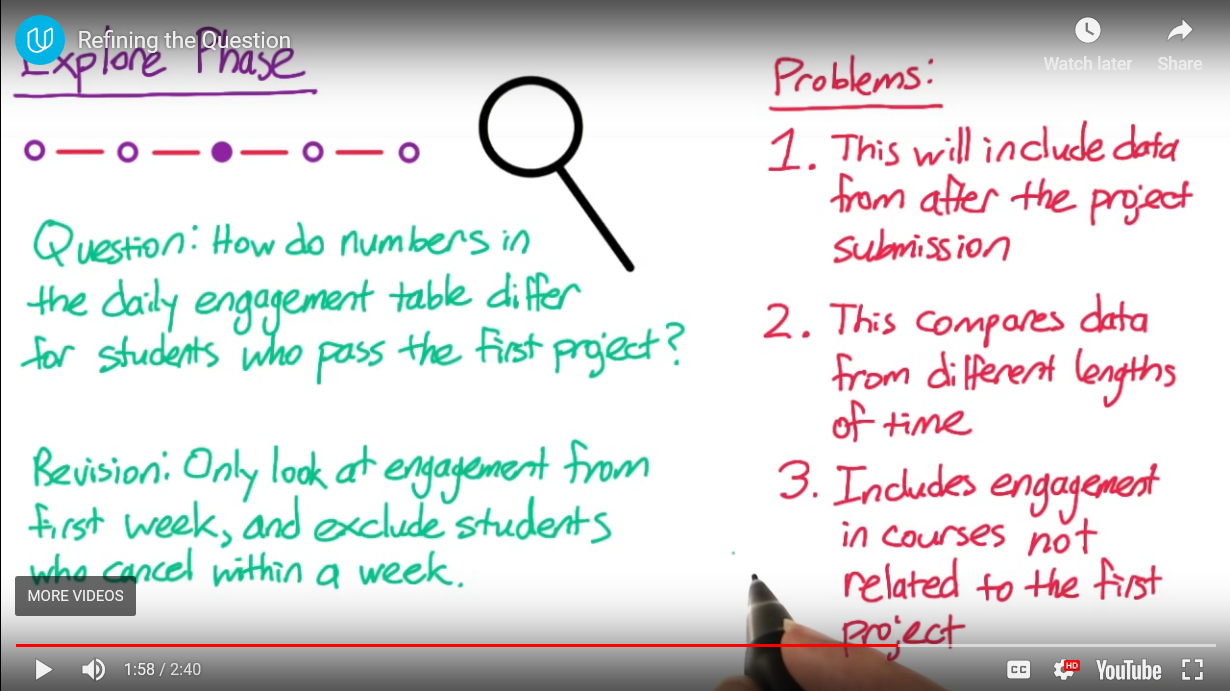

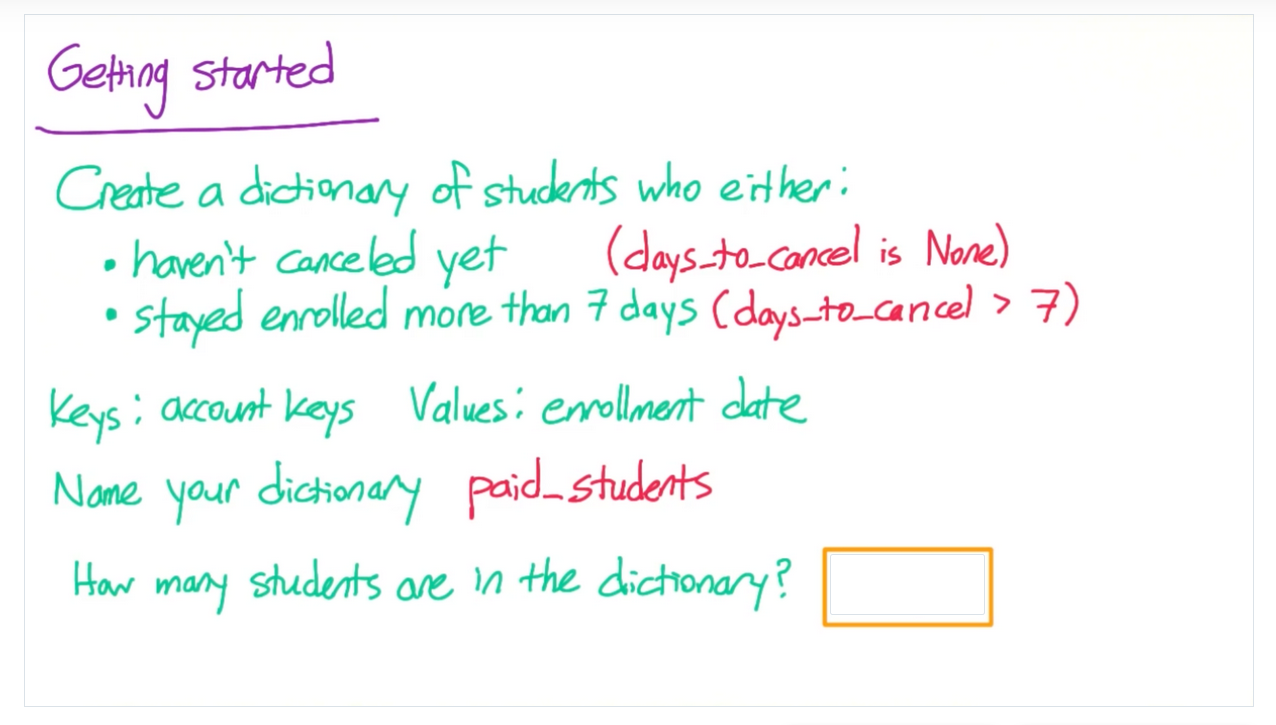

<h4>Paid Students</h4>

In [26]:
fuking_paid_students = dict()
count=0
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        count = count+1
        
count

1215

In [27]:
# Paid_students for enrollments.csv

paid_students = dict()
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        paid_students[account_key] = enrollment_date

len(paid_students)

995

<p>There is a slight bug in the above paid students. Students can have multiple enrollments as we have seen for an accountId : 1304.<br>
 To fix it save the latest enrollment date by overwriting the exisitng enrollment date if it is lesser</p>

In [28]:
paid_students = dict()
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        # paid_students[account_key] = enrollment_date
    
    # Fix the multiple joining dates by writing the latest date.
    if account_key not in paid_students or paid_students[account_key] < enrollment_date:
        paid_students[account_key] = enrollment['join_date']

len(paid_students)

995

<h4>Getting Data from First Week</h4>

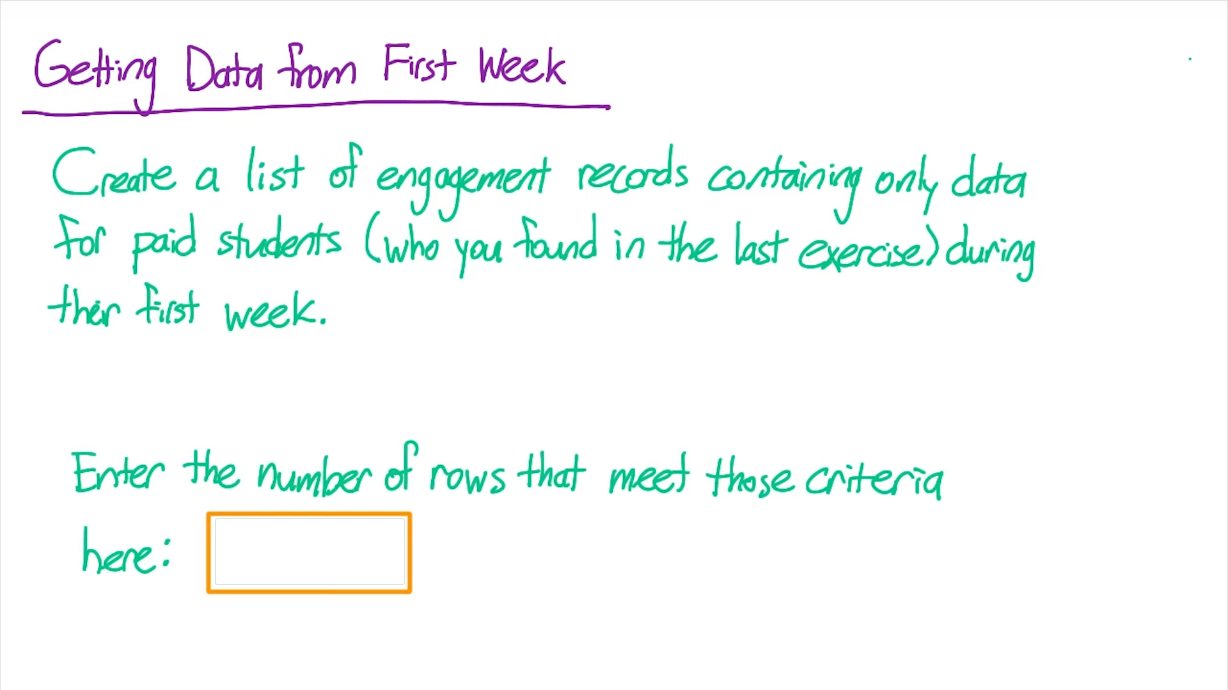

In [29]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    # print(type(time_delta.days)) #int
    return time_delta.days < 7 and time_delta.days >= 0

In [30]:
def remove_free_trail_students(data_list):
    new_data = []
    for item in data_list:
        if item['account_key'] in paid_students:
            new_data.append(item)
    return new_data

In [31]:
paid_students_in_enrollments = remove_free_trail_students(non_udacity_enrollments)
paid_students_in_enagagments = remove_free_trail_students(non_udacity_enagagements)
paid_students_in_submissions = remove_free_trail_students(non_udacity_submissions)

print(len(paid_students_in_enrollments))
print(len(paid_students_in_enagagments))
print(len(paid_students_in_submissions))

1293
134549
3618


<h4>Adding the 'has_visited' in the Engagement Table.</h4>

In [32]:
for each_engagement in paid_students_in_enagagments:
    if each_engagement['num_courses_visited'] > 0:
        each_engagement['has_visited'] = 1
    else:
        each_engagement['has_visited'] = 0

In [33]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for enagagement_record in paid_students_in_enagagments:
    account_key = enagagement_record['account_key']
    
    # We dont have a join_date coulumn in the enagagements.csv.
    # So,We use the dictionary paid_students which is built upon the enrollments.csv
    join_date = paid_students[account_key]
    
    enagagement_date = enagagement_record['utc_date']
    
    if within_one_week(join_date,enagagement_date):
        paid_engagement_in_first_week.append(enagagement_record)
    else:
        pass
    
paid_engagement_in_first_week[401]

OrderedDict([('utc_date', datetime.datetime(2015, 5, 8, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 18.5250461667),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '57'),
             ('has_visited', 1)])

In [34]:
# The student with '25' has below join_date and above mentioned utc_date ie., 2 Days in total
print(paid_students['25'])

2015-05-12 00:00:00


In [35]:
len(paid_engagement_in_first_week)

6919

<h3>Average minutes spent by each student in enagaments record</h3>

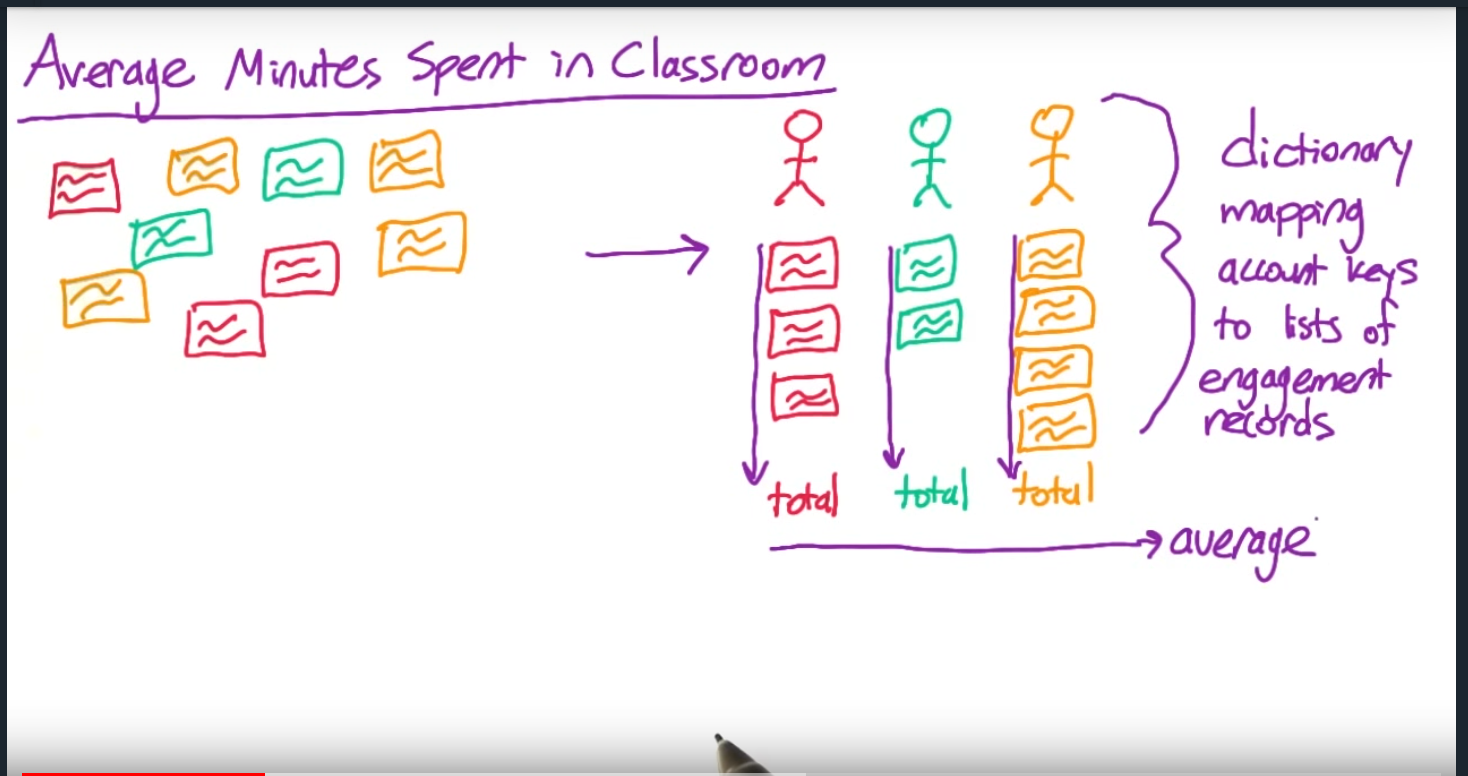


<br><b>Plan of Action</b>
<ol>
<li>Create a dictionary where all the account_keys are mapped to their respective total_minutes_visited records.Use <a href="https://docs.python.org/3.3/library/collections.html#collections.defaultdict">defaultdict()</a></li>
<li>Calculate all the values in each list mapped to each account</li>
<li>Use numpy and calculate the Average and other components</li>
</ol>

In [36]:
from collections import defaultdict

enagagement_by_account = defaultdict(list)
print(enagagement_by_account)

for each_record in paid_engagement_in_first_week:
    account_key = each_record['account_key']
    time_spent = each_record['total_minutes_visited']
    
    # adding to the defaultdict(list)
    enagagement_by_account[account_key].append(time_spent)

# A dict has an account_key as it's key value and all the time_spent records as the values in the list
for item in enagagement_by_account.items():
    print(item)
    break

defaultdict(<class 'list'>, {})
('0', [11.6793745, 37.2848873333, 53.6337463333, 33.4892696667, 64.7796776667, 151.617576833, 142.395963833])


In [37]:
for k,v in enagagement_by_account.items():
    print(f'''For Account {k} the sum is:{sum(v)}''')
    break;

For Account 0 the sum is:494.88049616599994


In [38]:
# Create a new Dictionary where key is account_key and value is the sum of all time_spent records
#Just add the above cell result to another dictionary
total_minutes_visited_by_each_account = {}

for account_key,enagagement_by_account_values in enagagement_by_account.items():
    total_minutes_visited = 0
    total_minutes_visited = sum(enagagement_by_account_values)
    # Now add the total_minutes to the new dictionary
    total_minutes_visited_by_each_account[account_key] = total_minutes_visited

for k,v in total_minutes_visited_by_each_account.items():
    print(f''' For Account :{k} the amount of time spent is :{v}''')
    break;

 For Account :0 the amount of time spent is :494.88049616599994


In [39]:
import numpy as np

total_minutes = total_minutes_visited_by_each_account.values()

np.mean(total_minutes)

TypeError: unsupported operand type(s) for /: 'dict_values' and 'int'

In [40]:
total_minutes = []
for value in total_minutes_visited_by_each_account.values():
    total_minutes.append(value)
print(sum(total_minutes))
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

305174.7851196613
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [41]:
# Time Spent by all the students in the minutes will be 
# The above method where We have taken a new list and appended each value from a dict.values() can be simply avoided
# with the following conversion
print(sum(list(total_minutes_visited_by_each_account.values())))

305174.7851196613


<b style="color:red;">NOTE</b>: The Maximum time spent is around 10568.100 minutes which is buggy because a week has only 10080 minutes (7*24*60) that means something is wrong. We are only including the students data who are engaged only in first week

In [42]:
for student_id,total_minutes in total_minutes_visited_by_each_account.items():
    if total_minutes_visited_by_each_account[student_id] > 10080:
        print(student_id)

In [43]:
problem_count = 0
simple_calc = []
for each_record in paid_engagement_in_first_week:
    if each_record['account_key'] == '108':
        problem_count = problem_count + 1
        simple_calc.append(each_record['total_minutes_visited'])
        #pp.pprint(each_record)
        # break
print(problem_count)
sum(simple_calc)

7


164.27089083347

In [44]:
paid_students['108']

datetime.datetime(2015, 4, 20, 0, 0)

<b style="color:red;">NOTE :</b> Clearly there are 110 enagament records for student id : __108__. But we are only calculating for paid_engagement in first week only. The Bug is in the within_one_week() function.

<p> So, in the function we are taking the engagement_date and checking against the join_date and if the difference is less than 7 days then it's returning true.But we never checked the engagement_date in the first i.e., what if the enagement_Date is less than the join_date ??? 
<br>    
The students who enrolled multiple times,everything from first enrollment will be considered as the first week.To fix it the there should be atleast zero days passedby after the join_date.

__MyObservation__: If the engagement_date is lesser than the join_date then the resulting value will be a Negative. So it can be atleast zero but not negative. So add a check >=0.

In [45]:
# Now check for the student after FIXING
for student_id,total_minutes in total_minutes_visited_by_each_account.items():
    if total_minutes_visited_by_each_account[student_id] > 10080:
        print(student_id)
    if total_minutes_visited_by_each_account[student_id] >= 3564:
        print(f'''Student who spent Maximum time is {student_id}''')

Student who spent Maximum time is 163


In [46]:
for each_record in paid_engagement_in_first_week:
    if each_record['account_key'] == '163':
        simple_calc.append(each_record['total_minutes_visited'])
        pp.pprint(each_record)

OrderedDict([   ('utc_date', datetime.datetime(2015, 7, 9, 0, 0)),
                ('num_courses_visited', 4),
                ('total_minutes_visited', 850.519339666),
                ('lessons_completed', 4),
                ('projects_completed', 0),
                ('account_key', '163'),
                ('has_visited', 1)])
OrderedDict([   ('utc_date', datetime.datetime(2015, 7, 10, 0, 0)),
                ('num_courses_visited', 6),
                ('total_minutes_visited', 872.633923334),
                ('lessons_completed', 6),
                ('projects_completed', 0),
                ('account_key', '163'),
                ('has_visited', 1)])
OrderedDict([   ('utc_date', datetime.datetime(2015, 7, 11, 0, 0)),
                ('num_courses_visited', 2),
                ('total_minutes_visited', 777.018903666),
                ('lessons_completed', 6),
                ('projects_completed', 0),
                ('account_key', '163'),
                ('has_visited', 1)])
Order

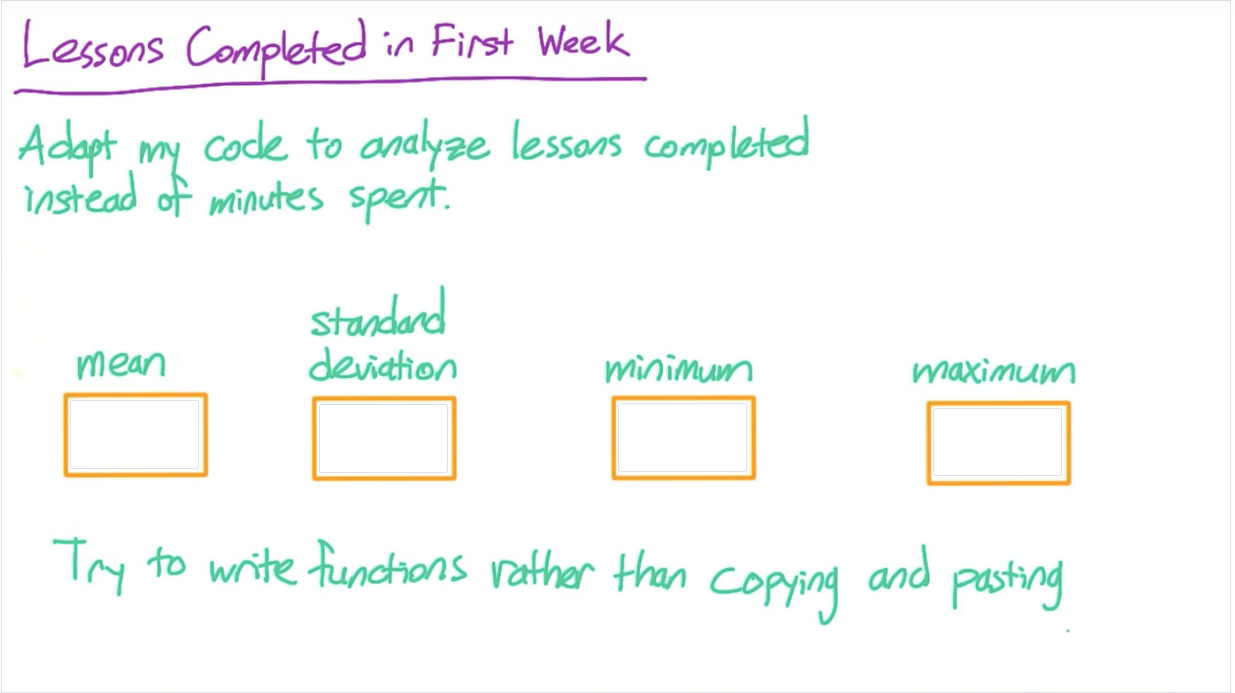

<h4> Plan of action </h4>
<ol>
<li>Create a default dictionary where key should be the account key and value should be the list of the lessons completed in first week from daily_engagments table</li>
<li>Sum up all the values ie., the lessons completed in first week</li>
<li>Calculate the desired mean,sd,min,max</li>
</ol>

In [47]:
lessons_completed_by_student = defaultdict(list)

for enagagement in paid_engagement_in_first_week:
    student_id = enagagement['account_key']
    # Append the lessons completed for each enagagment record into the dict
    lessons_completed_by_student[student_id].append(enagagement['lessons_completed'])

for k,v in lessons_completed_by_student.items():
    print("We got the key and list of the values of lessons completed")
    print(k,v)
    break

We got the key and list of the values of lessons completed
0 [0, 0, 0, 0, 0, 1, 0]


In [48]:
# Now Sum up all the values in the list
total_lessons_completed = 0
lessons_completed_in_first_week = {}
for student_id,lessons_completed_list in lessons_completed_by_student.items():
    total_lessons_completed = sum(lessons_completed_list)
    # Now Create the new dictionary with key as the student_id and the value as the total_lessons_completed
    lessons_completed_in_first_week[student_id] = total_lessons_completed

for k,v in lessons_completed_in_first_week.items():
    print(f'''The student {k} has completed the {v} lessons in total during the first week''')
    break;

The student 0 has completed the 1 lessons in total during the first week


In [49]:
total_lessons = (list(lessons_completed_in_first_week.values()))

In [50]:
print('Mean:', np.mean(total_lessons))
print('Standard deviation:', np.std(total_lessons))
print('Minimum:', np.min(total_lessons))
print('Maximum:', np.max(total_lessons))

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


<h3> Functionalize the above stuff </h3>

In [51]:
def group_data(data_list,key_name):
    grouped_data = defaultdict(list)
    
    for item in data_list:
        student_id = item[key_name]
        grouped_data[student_id].append(item)
    return grouped_data
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [52]:
print(engagement_by_account['1'])

[OrderedDict([('utc_date', datetime.datetime(2015, 5, 6, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 9.640248), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '1'), ('has_visited', 1)]), OrderedDict([('utc_date', datetime.datetime(2015, 5, 7, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '1'), ('has_visited', 0)]), OrderedDict([('utc_date', datetime.datetime(2015, 5, 8, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '1'), ('has_visited', 0)]), OrderedDict([('utc_date', datetime.datetime(2015, 5, 9, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '1'), ('has_visited', 0)]), OrderedDict([('utc_date', datetime.datetime(2015, 5, 10, 0, 0)), ('num_courses_visited', 0), ('total_minutes_v

In [53]:
def sum_group_items(grouped_data,field_name):
    summed_data = {}
    for student_id,dict_records in grouped_data.items():
        total = 0
        # total_1 = sum(list(values)) 
        #TypeError: unsupported operand type(s) for +: 'int' and 'collections.OrderedDict'
        for item in dict_records:
            total += item[field_name]
        summed_data[student_id] = total
    return summed_data

In [54]:
total_minutes_by_account = sum_group_items(engagement_by_account,'total_minutes_visited')
print(total_minutes_by_account['0'])

494.88049616599994


In [55]:
def print_the_data(data_item):
    print('Mean:', np.mean(data_item))
    print('Standard deviation:', np.std(data_item))
    print('Minimum:', np.min(data_item))
    print('Maximum:', np.max(data_item))

total_minutes = list(total_minutes_by_account.values())
print_the_data(total_minutes)

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


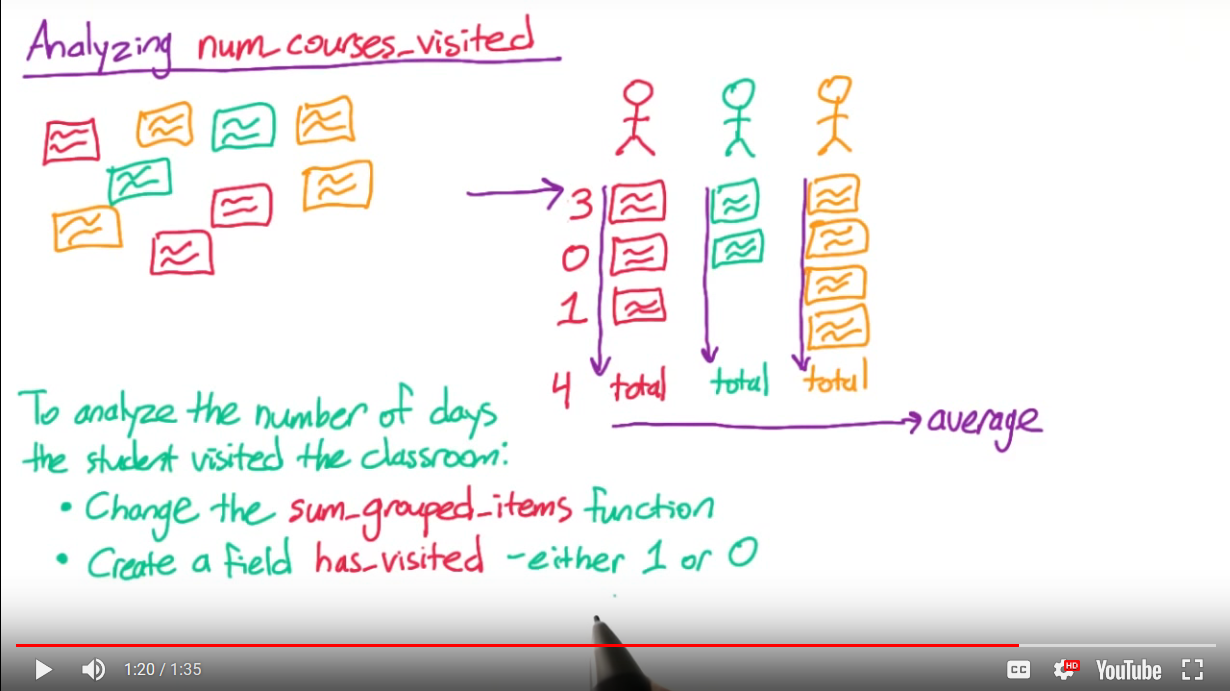

<b>Plan of Action : </b>
<ol>
    <li>The Problem with <b>num_courses_visited</b> is <br>1.a The student has a record in daily_engagments even if there is no engagement <br>1.b Student might be visiting the same course again and again.So,summing up the <b>num_courses_visited</b> bluntly is not a good idea. </li>
    <li>So, to overcome this calculate the <b>no:of days student has really engaged</b> create another field <b>has_visited</b> which is either 1 or 0 depends upon the engagment on that day.</li>
<li></li>
</ol>

In [56]:
real_engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [57]:
real_days_engaged_list = sum_group_items(real_engagement_by_account,'has_visited')
list_of_real_days = (list((real_days_engaged_list.values())))

In [58]:
print_the_data(list_of_real_days)

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


In [59]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

<b>Plan of Action</b>
<ul>
<li>We have the table paid_engagements_in_first_week which contains the data for first week only</li>
<li>We need to calculate the data for only during the first week. So, we need to link submissions data with the paid_enagaments</li>
<li></li>
</ul>

In [60]:
pass_subway_project = set()

In [61]:
for each_submission in paid_students_in_submissions:
    if each_submission['lesson_key'] in subway_project_lesson_keys:
        if each_submission['assigned_rating'] == 'PASSED' or each_submission['assigned_rating'] == 'DISTINCTION':
            pass_subway_project.add(each_submission['account_key'])

In [62]:
len(pass_subway_project)

647

In [63]:
for each_record in paid_engagement_in_first_week:
    if each_record['account_key'] in pass_subway_project:
        passing_engagement.append(each_record)
    else:
        non_passing_engagement.append(each_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


<h3>The Way I solved</h3>
<ul>
<li>Created a dictionary <b>paid_submissions</b> and tried to list the paid_submissions from <b>paid_students_in_submissions</b>  table using <b>paid_students</b> dict</li>
<li style="color:red;">But <b>paid_students</b> is built upon the enrollment table but not the enaggement table</li>
    <li>And then applied the logic of passed or non-passed stuff on <b>paid_submissions</b> dict </li>
<li>The whole thing got wrong.Below you can see</li>
</ul>

In [64]:
paid_students.keys()
paid_submissions = {}
passed=[]
for each_record in paid_students_in_submissions:
    if each_record['account_key'] in list(paid_students.keys()):
        paid_submissions[each_record['account_key']] = each_record;

for each_submission in paid_submissions.values():
    if each_submission['lesson_key'] in subway_project_lesson_keys:
        if each_submission['assigned_rating'] == 'PASSED' or each_submission['assigned_rating'] == 'DISTINCTION':
            passed.append(each_submission)
            
print(len(passed))

201


<b>Calculate Mean,SD,Max,Min for the Passed and Non-passed Students.</b>
<ol>
<li>Minutes Spent</li>
<li>Lessons Completed</li>
<li>Days Visited</li>
</ol>

<h4>Grouping the accounts</h4>

In [65]:
group_the_passing_by_account = group_data(passing_engagement,'account_key')
group_the_non_passing_by_account = group_data(non_passing_engagement,'account_key')

<b>total_minutes_visited</b>

In [66]:
print("--------PASSED----------")
sum_the_passing_for_total_minutes = sum_group_items(group_the_passing_by_account,'total_minutes_visited')
total_minutes_visited_by_passing = (list(sum_the_passing_for_total_minutes.values()))
print_the_data(total_minutes_visited_by_passing)

print("\n--------NON-PASSED----------")
sum_the_non_passing_for_total_minutes = sum_group_items(group_the_non_passing_by_account,'total_minutes_visited')
total_minutes_visited_by_non_passing = (list(sum_the_non_passing_for_total_minutes.values()))
print_the_data(total_minutes_visited_by_non_passing)


--------PASSED----------
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997

--------NON-PASSED----------
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


<b>lessons_completed</b>

In [67]:
print("--------PASSED----------")
sum_the_passing_for_lessons_completed = sum_group_items(group_the_passing_by_account,'lessons_completed')
total_lessons_completed_by_passing = (list(sum_the_passing_for_lessons_completed.values()))
print_the_data(total_lessons_completed_by_passing)
print("\n--------NON-PASSED----------")
sum_the_non_passing_for_lessons_completed = sum_group_items(group_the_non_passing_by_account,'lessons_completed')
total_lessons_completed_by_non_passing = (list(sum_the_non_passing_for_lessons_completed.values()))
print_the_data(total_lessons_completed_by_non_passing)

--------PASSED----------
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36

--------NON-PASSED----------
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


<b>Days Visited</b>

In [68]:
print("--------PASSED----------")
sum_the_passing_for_days_visited = sum_group_items(group_the_passing_by_account,'has_visited')
total_days_visited_by_passing = list(sum_the_passing_for_days_visited.values())
print_the_data(total_days_visited_by_passing)
print("\n--------NON-PASSED----------")
sum_the_non_passing_for_days_visited = sum_group_items(group_the_non_passing_by_account,'has_visited')
total_days_visited_by_non_passing = list(sum_the_non_passing_for_days_visited.values())
print_the_data(total_days_visited_by_non_passing)

--------PASSED----------
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7

--------NON-PASSED----------
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


<h3>Histograms</h3>

(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 10 Patch objects>)

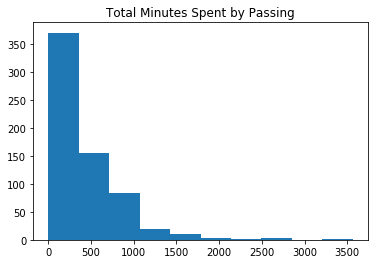

In [76]:
data = [1, 2, 1, 3, 3, 1, 4, 2,5]
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Total Minutes Spent by Passing')
plt.hist(total_minutes_visited_by_passing)


(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <a list of 10 Patch objects>)

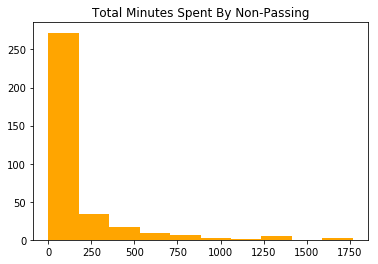

In [70]:
plt.title('Total Minutes Spent By Non-Passing')
plt.hist(total_minutes_visited_by_non_passing,color="orange")

(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

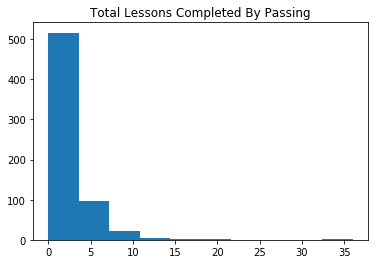

In [71]:
plt.title('Total Lessons Completed By Passing')
plt.hist(total_lessons_completed_by_passing)

(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

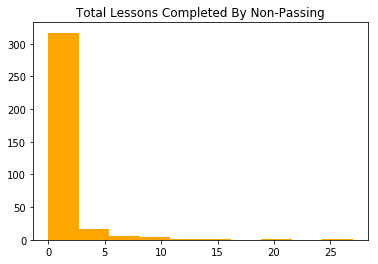

In [72]:
plt.title('Total Lessons Completed By Non-Passing')
plt.hist(total_lessons_completed_by_non_passing,color="orange")

(array([87., 82., 79.,  0., 91., 77.,  0., 85., 78., 68.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

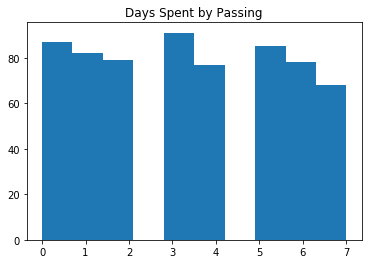

In [73]:
plt.title('Days Spent by Passing')
plt.hist(total_days_visited_by_passing)

(array([97., 90., 56., 41., 15., 24., 17.,  8.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <a list of 8 Patch objects>)

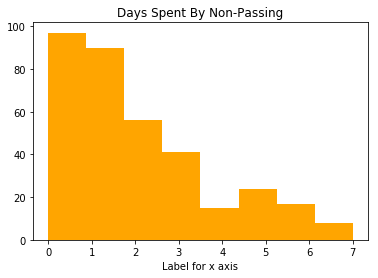

In [74]:
plt.title('Days Spent By Non-Passing')
plt.xlabel("Label for x axis")
plt.hist(total_days_visited_by_non_passing,color="orange",bins=8)

Text(0.5, 1.0, 'Distribution of classroom visits in the first week for students who do not pass the subway project')

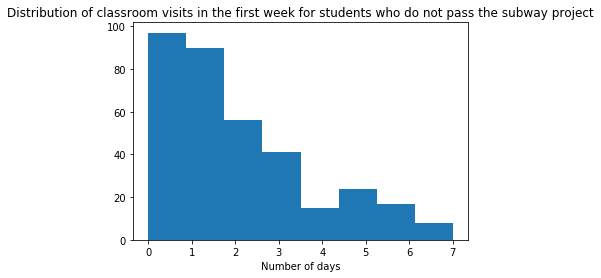

In [75]:
# From Udacity 
plt.hist(total_days_visited_by_non_passing, bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')